In [1]:
import tensorflow as tf
import numpy as np
import csv as csv

csv_file = csv.reader(open('data/titanic/train.csv', 'rt'))

header = next(csv_file) #only in python 3
data = []

for row in csv_file:
    data.append(row)

data = np.array(data)
print(header)
print(data.shape)
print(data)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
(891, 12)
[['1' '0' '3' ..., '7.25' '' 'S']
 ['2' '1' '1' ..., '71.2833' 'C85' 'C']
 ['3' '1' '3' ..., '7.925' '' 'S']
 ..., 
 ['889' '0' '3' ..., '23.45' '' 'S']
 ['890' '1' '1' ..., '30' 'C148' 'C']
 ['891' '0' '3' ..., '7.75' '' 'Q']]


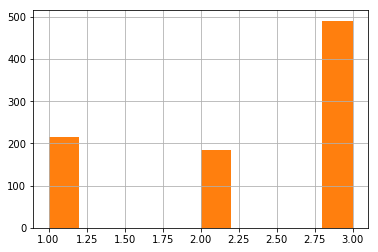

In [3]:
import pandas as pd
import pylab as P
df = pd.read_csv('data/titanic/train.csv', header=0)
df['Pclass'].hist()
P.show()

In [4]:
df['Gender'] = df['Sex'].map({'female':0, 'male':1}).astype(int)
#df = df.dropna()
train_data = df.values
train_data.shape

(891, 13)

In [5]:
train_df = pd.read_csv('data/titanic/train.csv', header=0)
test_df = pd.read_csv('data/titanic/test.csv', header=0)
full_df = train_df.append(test_df, ignore_index = True)
print(full_df.shape)

(1309, 12)


In [6]:
#sex = pd.Series( np.where( full_df.Sex == 'male' , 1 , 0 ) , name = 'Sex' )
#full_df.head()
#embarked = pd.get_dummies(full_df.Embarked, prefix = 'Embarked')
#embarked.head()
#pClass = pd.get_dummies(full_df.Pclass, prefix = 'Pclass')
#pClass.head()

In [7]:
#below code copy from https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish
#just to familier data transform
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    
    
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

data_train = transform_features(train_df)
data_test = transform_features(test_df)
data_train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.


In [8]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
    
data_train, data_test = encode_features(data_train, data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,7,0,0,0,7,329,16
3,4,1,1,0,7,1,0,3,2,267,20
4,5,0,3,1,7,0,0,1,7,15,19


In [56]:
from sklearn.model_selection import train_test_split

X_all = data_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = data_train['Survived']

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)
print("X Train:" + str(X_train.shape))
print("Y Train:" + str(y_train.shape))

X_train = X_train.T
y_train = y_train.values.reshape(y_train.shape[0], 1)
y_train = y_train.T

X_test = X_test.T
y_test = y_test.values.reshape(y_test.shape[0], 1)
y_test = y_test.T
print("X_train : ", X_train.shape)
print("Y train : ", y_train.shape)
print("X_test : ", X_test.shape)
print("Y test : ", y_test.shape)

X Train:(712, 9)
Y Train:(712,)
X_train :  (9, 712)
Y train :  (1, 712)
X_test :  (9, 179)
Y test :  (1, 179)


In [70]:
import tensorflow as tf
import numpy as np

"""
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- scalar, number of classes (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    
    Tips:
    - You will use None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """
X = tf.placeholder(tf.float32, shape = (X_train.shape[0], None))
Y = tf.placeholder(tf.float32, shape = (1, None))
print("X = " + str(X))
print("Y = " + str(Y))

#b1 = tf.get_variable("b1", [1], initializer = tf.zeros_initializer())
#W1 = tf.get_variable("W1", [791,1], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
'''
shape of W1 is (output size, input feature size)
'''
b1 = tf.Variable(tf.zeros([1]))
W1 = tf.Variable(tf.random_uniform([1,9]))
y = tf.matmul(W1, X) + b1

parameters = {"W1": W1,
                  "b1": b1}

print("y = " + str(y))

X = Tensor("Placeholder_40:0", shape=(9, ?), dtype=float32)
Y = Tensor("Placeholder_41:0", shape=(1, ?), dtype=float32)
y = Tensor("add_4:0", shape=(1, ?), dtype=float32)


In [71]:
loss = tf.reduce_mean(tf.square(y - y_train))
optimiser = tf.train.GradientDescentOptimizer(0.5)
train = optimiser.minimize(loss)

In [76]:

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(0, 100):
        _, batch_cost = sess.run([train, loss], feed_dict={X: X_train, Y: y_train})
        if(step % 20 == 0):
            print("Cost:", batch_cost)
            #print(step, sess.run(W), sess.run(b))

Cost: 93843.0
Cost: nan
Cost: nan
Cost: nan
Cost: nan


In [ ]:
#TEST


In [78]:
'''from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)'''

"from sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import make_scorer, accuracy_score\nfrom sklearn.model_selection import GridSearchCV\n\n# Choose the type of classifier. \nclf = RandomForestClassifier()\n\n# Choose some parameter combinations to try\nparameters = {'n_estimators': [4, 6, 9], \n              'max_features': ['log2', 'sqrt','auto'], \n              'criterion': ['entropy', 'gini'],\n              'max_depth': [2, 3, 5, 10], \n              'min_samples_split': [2, 3, 5],\n              'min_samples_leaf': [1,5,8]\n             }\n\n# Type of scoring used to compare parameter combinations\nacc_scorer = make_scorer(accuracy_score)\n\n# Run the grid search\ngrid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)\ngrid_obj = grid_obj.fit(X_train, y_train)\n\n# Set the clf to the best combination of parameters\nclf = grid_obj.best_estimator_\n\n# Fit the best algorithm to the data. \nclf.fit(X_train, y_train)"

In [29]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.810055865922


In [30]:
from sklearn.cross_validation import KFold

def run_kfold(clf):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(clf)

Fold 1 accuracy: 0.8
Fold 2 accuracy: 0.8539325842696629
Fold 3 accuracy: 0.797752808988764
Fold 4 accuracy: 0.8651685393258427
Fold 5 accuracy: 0.8314606741573034
Fold 6 accuracy: 0.8089887640449438
Fold 7 accuracy: 0.7752808988764045
Fold 8 accuracy: 0.8089887640449438
Fold 9 accuracy: 0.8651685393258427
Fold 10 accuracy: 0.8314606741573034
Mean Accuracy: 0.8238202247191012


C:\Users\dada\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
ids = data_test['PassengerId']
predictions = clf.predict(data_test.drop('PassengerId', axis=1))


output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
# output.to_csv('titanic-predictions.csv', index = False)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
